In [2]:
from ultralytics import YOLO
import YoloLidarTools as ylt
import importlib
importlib.reload(ylt);
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

model = YOLO('yolov8n.pt')
matplotlib.rcParams['figure.figsize'] = (15,10)

In [3]:
!nvidia-smi

Tue Dec  5 00:56:52 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A5000               On  | 00000000:02:00.0 Off |                  Off |
| 30%   30C    P8              22W / 230W |    920MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--


0: 480x640 23 persons, 1 boat, 1 fire hydrant, 5.0ms
Speed: 1.5ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


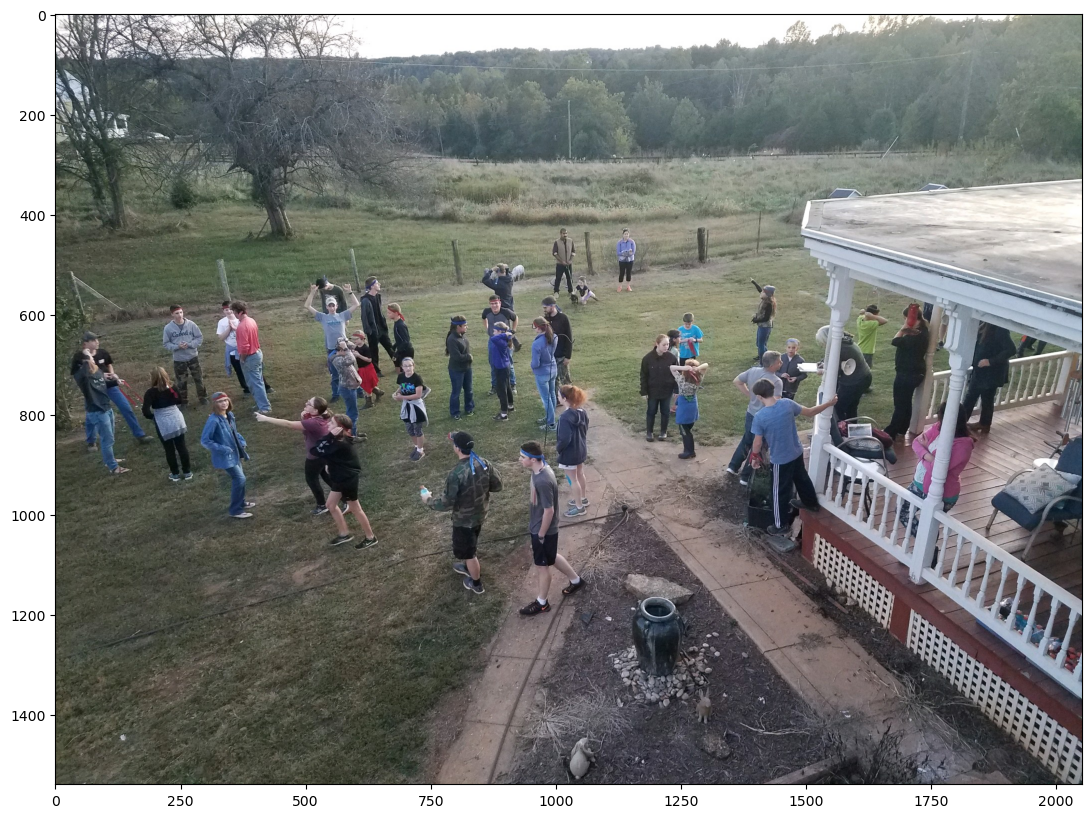

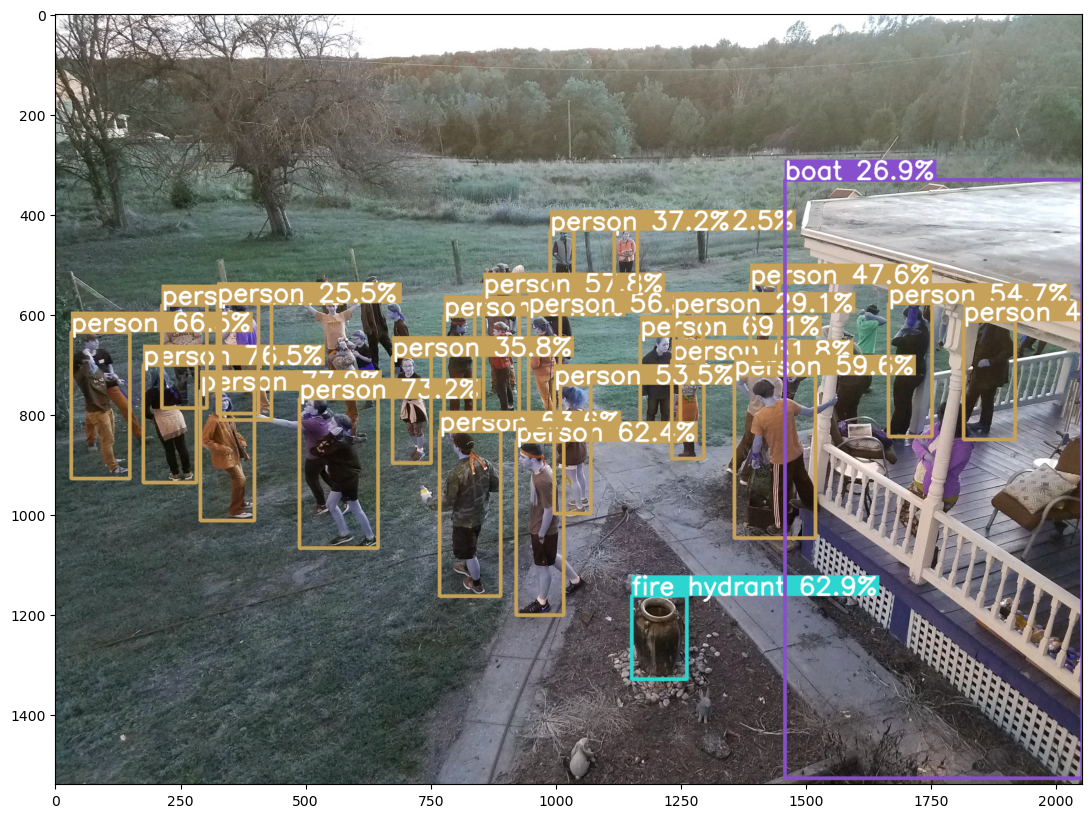

In [9]:
fname = './capture_the_flag.jpg'
image = Image.open(fname)
imArr = np.asarray(image)
plt.figure()
plt.imshow(imArr)
results = model.predict(source=image,
                        conf=0.25
                        )
plt.figure()
ylt.plot_bboxes(imArr, results[0].boxes.data, score=True)


0: 640x640 1 broccoli, 5.0ms
Speed: 17.5ms preprocess, 5.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


<Figure size 1500x1000 with 0 Axes>

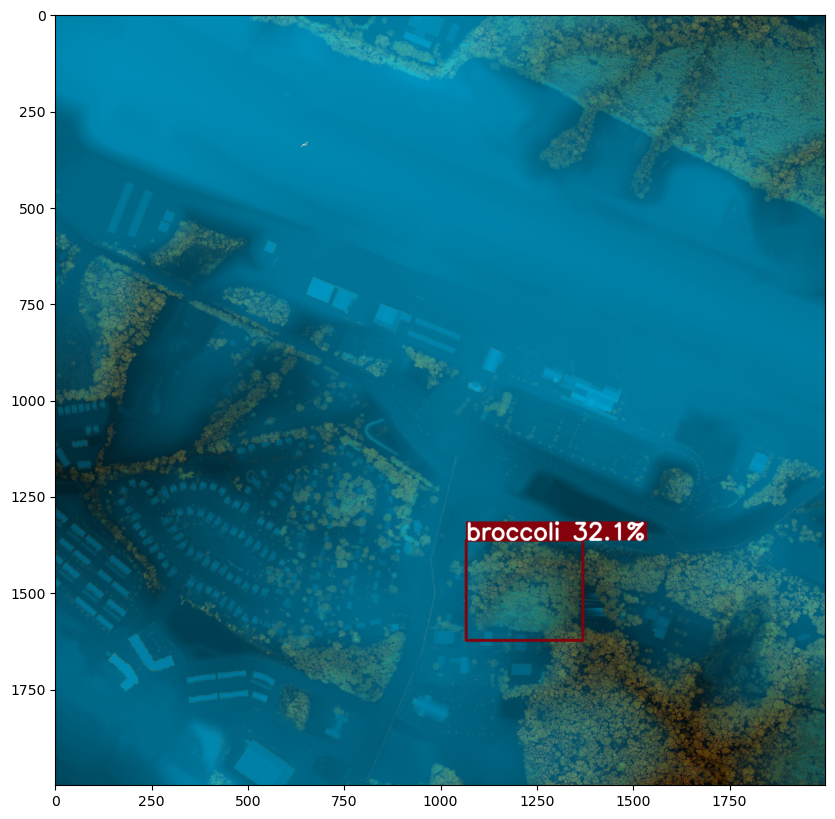

<Figure size 1500x1000 with 0 Axes>

In [11]:
fname = './data_for_dem/airport.png'
image = Image.open(fname)
imArr = np.asarray(image)
plt.figure()
plt.imshow(imArr)
results = model.predict(source=image,
                        conf=0.25
                        )
ylt.plot_bboxes(imArr, results[0].boxes.data, score=True)
plt.figure()